In [44]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import umap
import xgboost as xgb



ModuleNotFoundError: No module named 'umap'

# New Section

Saving Diabetestype.csv to Diabetestype.csv


In [35]:
df = pd.read_csv('Diabetestype.csv')

In [14]:
df.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


In [ ]:
df.isnull().sum()


Age         0
BS Fast     0
BS pp       0
Plasma R    0
Plasma F    0
HbA1c       0
Type        0
Class       0
dtype: int64

In [ ]:
print(df.columns)

Index(['Age', 'BS Fast', 'BS pp', 'Plasma R', 'Plasma F', 'HbA1c', 'Type',
       'Class'],
      dtype='object')


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Convert 'Type' column to numerical labels
df['Type'] = label_encoder.fit_transform(df['Type'])

# Display the transformed data
print(df)


      Age  BS Fast  BS pp  Plasma R  Plasma F  HbA1c  Type  Class
0      50      6.8    8.8      11.2       7.2     62     1      1
1      31      5.2    6.8      10.9       4.2     33     0      0
2      32      6.8    8.8      11.2       7.2     62     1      1
3      21      5.7    5.8      10.7       4.8     49     0      0
4      33      6.8    8.8      11.2       7.2     62     1      1
...   ...      ...    ...       ...       ...    ...   ...    ...
1004   37      0.0    5.6      10.2       5.4     32     0      0
1005   23      6.3    4.2      12.2       7.8     57     2      1
1006   37     32.0    7.4       8.7       5.6     41     0      0
1007   46     19.0    6.3       7.9       3.9     40     0      0
1008   25     16.0    6.3       7.9       3.9     40     0      0

[1009 rows x 8 columns]


<Axes: >

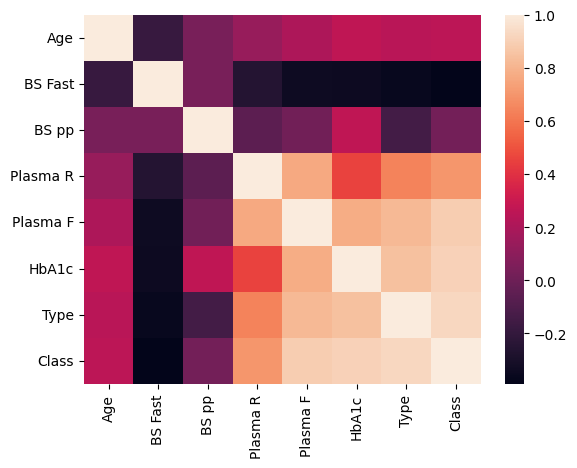

In [ ]:
df1 = df.corr()
sns.heatmap(df1)

In [37]:
df=df.drop('Class',axis=1)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Type',axis=1)
y_type = df['Type']

# Create an instance of RandomOverSampler to balance the data
random_oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on the data
X_resampled, y_resampled = random_oversampler.fit_resample(X, y_type)

# Update the DataFrame with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the updated class distribution
class_distribution = df['Type'].value_counts()
print(class_distribution)


0    631
1    631
2    631
Name: Type, dtype: int64


In [18]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type
0,50,6.8,8.8,11.2,7.2,62,1
1,31,5.2,6.8,10.9,4.2,33,0
2,32,6.8,8.8,11.2,7.2,62,1
3,21,5.7,5.8,10.7,4.8,49,0
4,33,6.8,8.8,11.2,7.2,62,1
...,...,...,...,...,...,...,...
1888,26,6.8,8.2,11.6,7.4,69,2
1889,25,6.9,8.4,11.2,7.2,62,2
1890,25,6.8,4.8,13.1,9.1,58,2
1891,29,6.1,5.7,12.6,8.1,49,2


In [ ]:
class_distribution = df['Type'].value_counts()
print(class_distribution)

1    631
0    631
2    631
Name: Type, dtype: int64


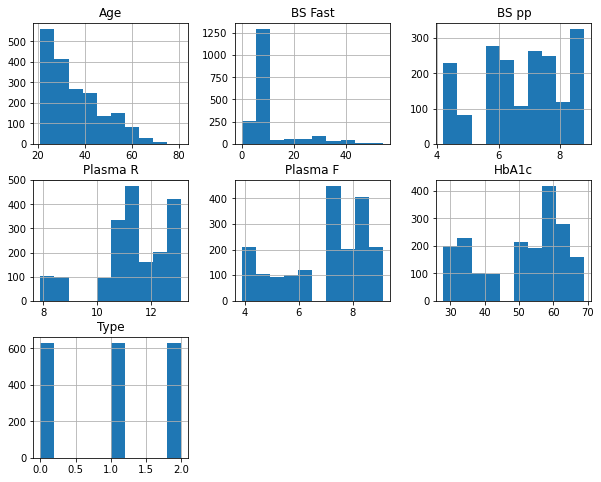

In [19]:
df.hist(figsize=(10, 8))
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Separate the numeric features from the categorical features
numeric_features = ['Age', 'BS Fast', 'BS pp', 'Plasma R', 'Plasma F', 'HbA1c']
X_numeric = df[numeric_features]

# Standardization (Z-score normalization) for numeric features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_numeric)

# Min-Max scaling (Normalization) for numeric features
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_numeric)

# Replace the original numeric features with the standardized or normalized values
df[numeric_features] = X_standardized  # Use X_normalized if you want to use Min-Max scaling

# Print the updated DataFrame
print(df)


           Age   BS Fast     BS pp  Plasma R  Plasma F     HbA1c  Type
0     1.265204 -0.301282  1.411660 -0.085756  0.135572  0.969828     1
1    -0.363078 -0.469254  0.018908 -0.314721 -1.789699 -1.423655     0
2    -0.277379 -0.301282  1.411660 -0.085756  0.135572  0.969828     1
3    -1.220068 -0.416763 -0.677467 -0.467364 -1.404644 -0.103113     0
4    -0.191680 -0.301282  1.411660 -0.085756  0.135572  0.969828     1
...        ...       ...       ...       ...       ...       ...   ...
1888 -0.791573 -0.301282  0.993834  0.219531  0.263924  1.547565     2
1889 -0.877272 -0.290784  1.133109 -0.085756  0.135572  0.969828     2
1890 -0.877272 -0.301282 -1.373843  1.364355  1.354911  0.639692     2
1891 -0.534476 -0.374770 -0.747105  0.982747  0.713154 -0.103113     2
1892 -1.220068 -0.353774 -1.791668  0.677460  0.520627  0.557158     2

[1893 rows x 7 columns]


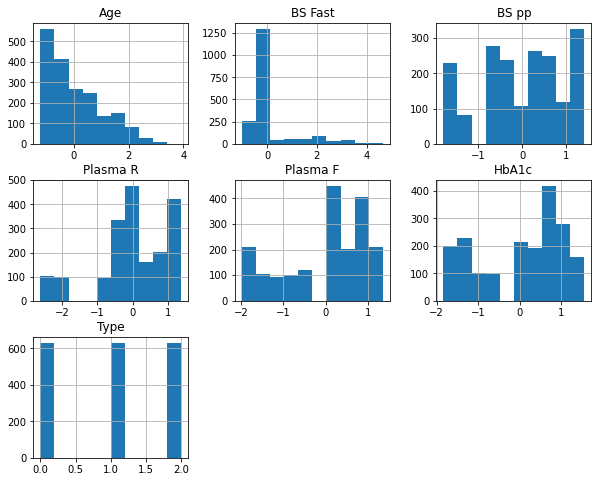

In [22]:
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
min_values = df[numeric_features].min()
max_values = df[numeric_features].max()

print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 Age        -1.220068
BS Fast    -1.015163
BS pp      -1.791668
Plasma R   -2.604370
Plasma F   -1.982226
HbA1c      -1.836325
dtype: float64

Maximum values:
 Age         3.921874
BS Fast     4.653888
BS pp       1.411660
Plasma R    1.364355
Plasma F    1.354911
HbA1c       1.547565
dtype: float64


In [ ]:
X = df.drop(['concatenated_column'], axis=1).values  # Features
concatenated_column = df['concatenated_column'].values  # New concatenated column

# Initialize UMAP with desired parameters
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the modified dataset using UMAP
umap_result = umap_model.fit_transform(X)

print(umap_result)

In [40]:
# shuffle the DataFrame rows
"""df = df.sample(frac = 1)
df.columns"""
from sklearn.utils import shuffle
df = shuffle(df)

In [41]:
X , y = df.drop(['Type'],axis =1),df['Type']
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)


In [42]:
# Creating the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Training the classifier using the training data
decision_tree.fit(X_train, y_train)

# Making predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Calculating the precision of the classifier
precision = precision_score(y_test, y_pred,average='macro')

# Calculating the recall of the classifier
recall = recall_score(y_test, y_pred,average='macro')

# Calculating the F1 score of the classifier
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.30606860158311344
Precision: 0.305607991585271
Recall: 0.30411325161709146
F1 Score: 0.30330685873086344


In [43]:


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred , average='macro')
f1 = f1_score(y_test, y_pred , average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.3034300791556728
Precision: 0.30858671605700466
Recall: 0.3064031133821221
F1 Score: 0.30345858368457235


In [17]:
svm_classifier = SVC(random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3007915567282322
Precision: 0.304648883214556
Recall: 0.30390303879164565
F1 Score: 0.2917820028892306


In [19]:
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Fit the classifier on the training data
xgboost_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgboost_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [12]:
knn_classifier = KNeighborsClassifier()

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.34300791556728233
Precision: 0.34261466674817126
Recall: 0.34288713910761154
F1 Score: 0.3352110114928147
